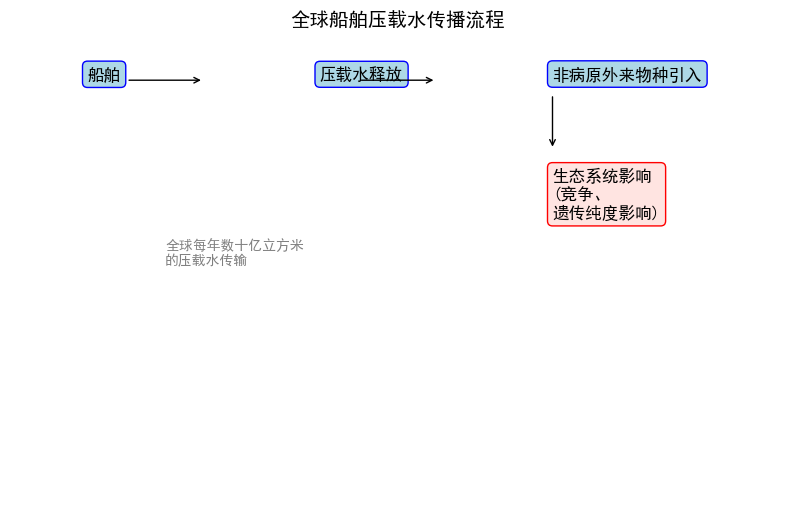

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [12]:
# -*- coding: utf-8 -*-


import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体（适用于中文）
rcParams['axes.unicode_minus'] = False   # 解决坐标轴负号显示问题
# 1. Create a flowchart visualization (simplified example using matplotlib annotations)
fig, ax = plt.subplots(figsize=(10, 6))

# Adding flowchart components
ax.text(0.1, 0.9, "船舶", fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='lightblue'))
ax.text(0.4, 0.9, "压载水释放", fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='lightblue'))
ax.text(0.7, 0.9, "非病原外来物种引入", fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='lightblue'))
ax.text(0.7, 0.6, "生态系统影响\n(竞争、\n遗传纯度影响)", fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='mistyrose'))

# Drawing arrows
ax.annotate("", xy=(0.25, 0.9), xytext=(0.15, 0.9),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate("", xy=(0.55, 0.9), xytext=(0.45, 0.9),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate("", xy=(0.7, 0.75), xytext=(0.7, 0.87),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Adding additional explanation
ax.text(0.2, 0.5, "全球每年数十亿立方米\n的压载水传输", fontsize=10, color='gray')

# Hide axes for cleaner appearance
ax.axis('off')
plt.title("全球船舶压载水传播流程", fontsize=14, weight='bold')
plt.show()

# 2. World map heatmap for ballast water impact areas
# Load world shape data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Example impact regions (simplified)
impact_points = gpd.GeoDataFrame({
    'region': ['地中海', '南非沿海'],
    'geometry': [Point(15, 40), Point(18, -34)],
    'impact_level': [0.8, 0.6]  # Example levels of impact
}, crs="EPSG:4326")

# Create base plot
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')
impact_points.plot(column='impact_level', ax=ax, legend=True, cmap='Reds',
                   markersize=100, edgecolor='black')

# Customize plot
for x, y, label in zip(impact_points.geometry.x, impact_points.geometry.y, impact_points['region']):
    ax.text(x + 2, y, label, fontsize=9, color='darkred')

plt.title("压载水对生态系统影响的热区", fontsize=14, weight='bold')
plt.show()

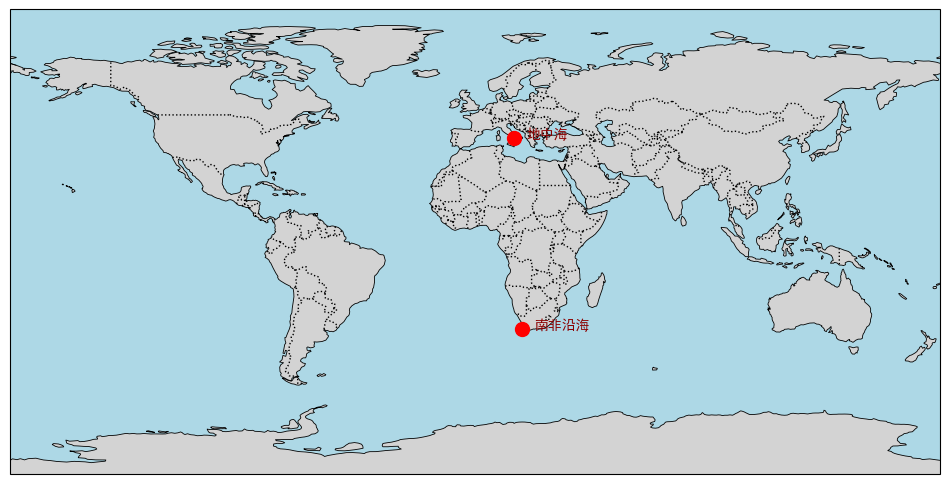

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 创建离线地图
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# 添加基础地理特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 设置地图的显示范围（调整为整个地球）
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# 标记热区
impact_points = {
    "地中海": (15, 40),
    "南非沿海": (18, -34)
}
for region, (lon, lat) in impact_points.items():
    ax.plot(lon, lat, 'ro', markersize=10, transform=ccrs.PlateCarree())
    ax.text(lon + 5, lat, region, fontsize=10, color='darkred', transform=ccrs.PlateCarree())

# 添加标题
# plt.title("压载水对生态系统影响的热区", fontsize=14, weight='bold')

# 导出为SVG文件
plt.savefig('ballast_water_impact_map.svg', format='svg')

# 显示地图
plt.show()


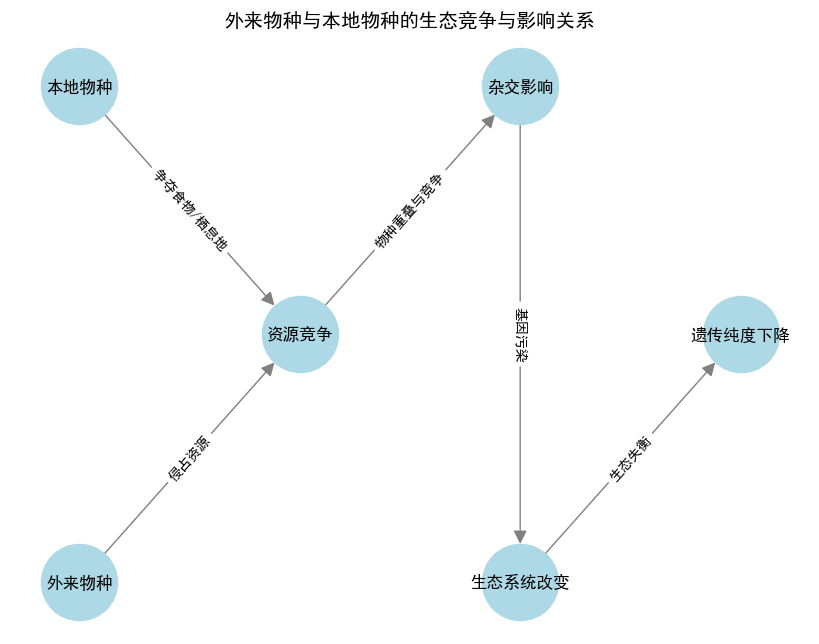

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph for ecological competition
G = nx.DiGraph()

# Add nodes representing species and their ecological states
G.add_node("本地物种", pos=(0, 1))
G.add_node("外来物种", pos=(0, -1))
G.add_node("资源竞争", pos=(1, 0))
G.add_node("杂交影响", pos=(2, 1))
G.add_node("生态系统改变", pos=(2, -1))
G.add_node("遗传纯度下降", pos=(3, 0))

# Add edges between nodes to represent the ecological interactions
G.add_edge("本地物种", "资源竞争", label="争夺食物/栖息地")
G.add_edge("外来物种", "资源竞争", label="侵占资源")
G.add_edge("资源竞争", "杂交影响", label="物种重叠与竞争")
G.add_edge("杂交影响", "生态系统改变", label="基因污染")
G.add_edge("生态系统改变", "遗传纯度下降", label="生态失衡")

# Plot the graph
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 6))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold',
        edge_color='gray', arrowsize=20)

# Annotate edges with labels to describe the ecological processes
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("外来物种与本地物种的生态竞争与影响关系", fontsize=14, weight='bold')
plt.axis('off')
plt.savefig('affect.svg', format='svg')
plt.show()


In [33]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph(comment='Causal Loop of Invasive Species and Red Tide')

# 添加节点，节点可以表示不同的因素
dot.node('A', 'Invasive Species Proliferation')
dot.node('B', 'Red Tide Occurrence')
dot.node('C', 'Ecosystem Condition')
dot.node('D', 'Adaptability of Invasive Species')

# 添加因果关系的箭头
dot.edge('A', 'B', label='Promotes')
dot.edge('B', 'C', label='Changes')
dot.edge('C', 'D', label='Affects')
dot.edge('D', 'A', label='Feedback')

# 设置反馈箭头以展示循环
dot.edge('B', 'A', label='Enhances')  # 形成反馈关系

# 渲染并保存为SVG
dot.render('causal_loop_invasive_species_red_tide', format='svg', cleanup=True)

# 显示图
dot.view()


'causal_loop_invasive_species_red_tide.pdf'

HTML图像已保存为：/mnt/data/research_methods_tree_vertical.html


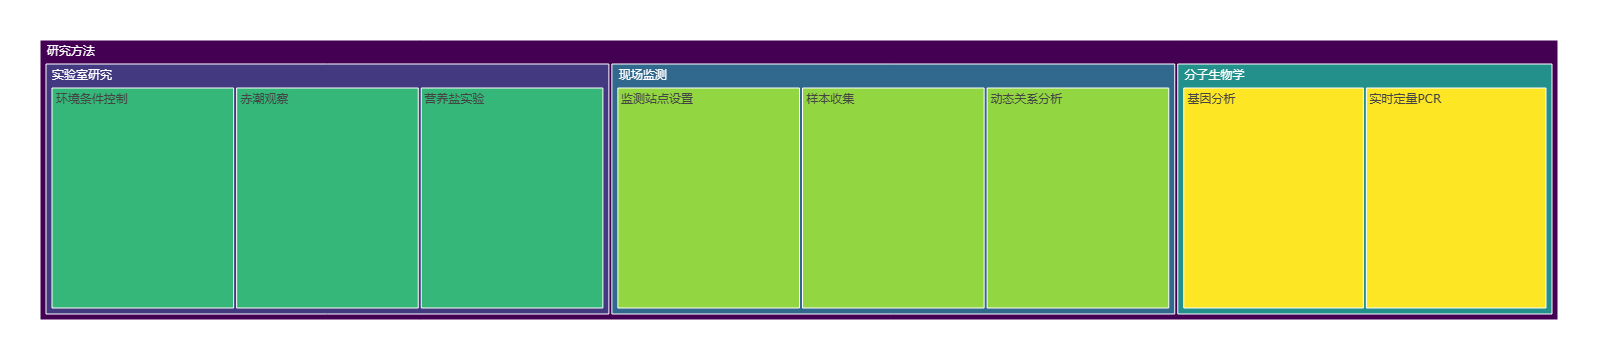

In [59]:
import plotly.graph_objects as go

# 定义树图的结构
labels = ['研究方法', '实验室研究', '现场监测', '分子生物学', 
          '环境条件控制', '赤潮观察', '营养盐实验', 
          '监测站点设置', '样本收集', '动态关系分析',
          '基因分析', '实时定量PCR']

parents = ['', '研究方法', '研究方法', '研究方法', 
           '实验室研究', '实验室研究', '实验室研究', 
           '现场监测', '现场监测', '现场监测',
           '分子生物学', '分子生物学']

# 创建树图
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    marker=dict(colors=[0, 1, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6], colorscale='Viridis'),
    textinfo="label+value",  # 不显示百分比
    branchvalues="total"  # 保持节点大小为其子树大小
))

# 更新布局，设定竖直排列
fig.update_layout(
    # title="海洋外来种与赤潮研究方法层次树图", 
    font_size=12,
    title_x=0.5,
    title_y=0.95, 
    margin=dict(t=40, b=40, l=40, r=40),
)

# 输出为 HTML 文件
fig.write_html("/mnt/data/research_methods_tree_vertical.html")

# 显示保存路径
print("HTML图像已保存为：/mnt/data/research_methods_tree_vertical.html")

# 显示图形
fig.show()


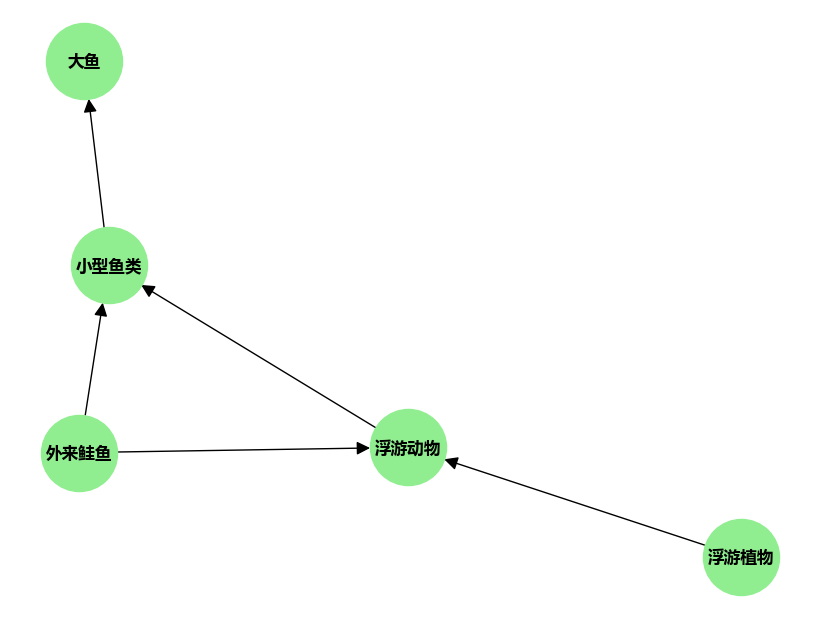

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个有向图
G = nx.DiGraph()

# 节点代表物种，箭头代表捕食关系
G.add_edges_from([
    ('浮游植物', '浮游动物'), 
    ('浮游动物', '小型鱼类'), 
    ('小型鱼类', '大鱼'),
    ('外来鲑鱼', '小型鱼类'), # 外来种引入影响食物链
    ('外来鲑鱼', '浮游动物')
])

# 画出食物链图
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # 布局设置
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=20)
plt.savefig('外来种对生态系统食物链结构的影响.svg')
# 显示图
plt.show()


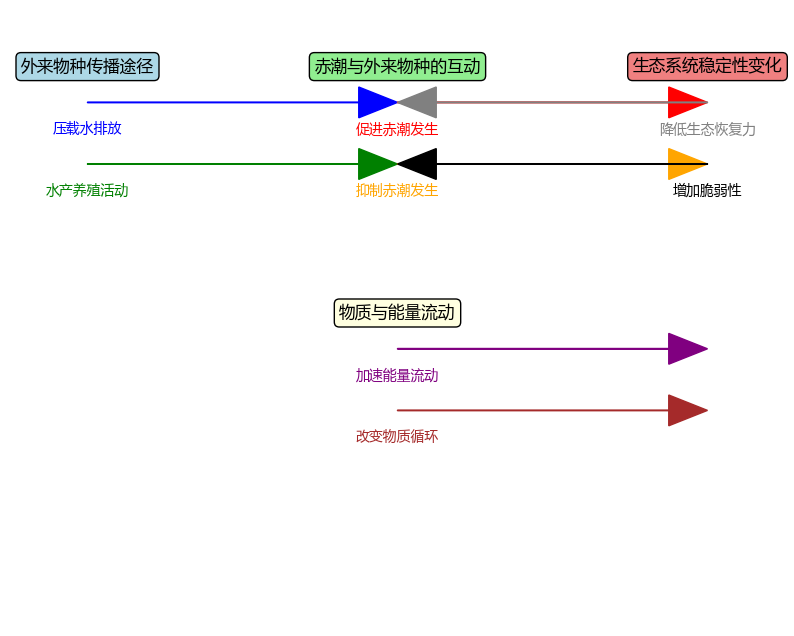

In [72]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 创建一个图形和一个子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制外来物种传播途径（压载水和水产养殖）
ax.annotate('外来物种传播途径', xy=(0.1, 0.9), fontsize=12, ha='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.3'))
ax.arrow(0.1, 0.85, 0.35, 0, head_width=0.05, head_length=0.05, fc='blue', ec='blue')
ax.annotate('压载水排放', xy=(0.1, 0.8), fontsize=10, ha='center', color='blue')

ax.arrow(0.1, 0.75, 0.35, 0, head_width=0.05, head_length=0.05, fc='green', ec='green')
ax.annotate('水产养殖活动', xy=(0.1, 0.7), fontsize=10, ha='center', color='green')

# 赤潮与外来物种的互动
ax.annotate('赤潮与外来物种的互动', xy=(0.5, 0.9), fontsize=12, ha='center', bbox=dict(facecolor='lightgreen', edgecolor='black', boxstyle='round,pad=0.3'))

ax.arrow(0.5, 0.85, 0.35, 0, head_width=0.05, head_length=0.05, fc='red', ec='red')
ax.annotate('促进赤潮发生', xy=(0.5, 0.8), fontsize=10, ha='center', color='red')

ax.arrow(0.5, 0.75, 0.35, 0, head_width=0.05, head_length=0.05, fc='orange', ec='orange')
ax.annotate('抑制赤潮发生', xy=(0.5, 0.7), fontsize=10, ha='center', color='orange')

# 物质与能量流动的影响
ax.annotate('物质与能量流动', xy=(0.5, 0.5), fontsize=12, ha='center', bbox=dict(facecolor='lightyellow', edgecolor='black', boxstyle='round,pad=0.3'))

ax.arrow(0.5, 0.45, 0.35, 0, head_width=0.05, head_length=0.05, fc='purple', ec='purple')
ax.annotate('加速能量流动', xy=(0.5, 0.4), fontsize=10, ha='center', color='purple')

ax.arrow(0.5, 0.35, 0.35, 0, head_width=0.05, head_length=0.05, fc='brown', ec='brown')
ax.annotate('改变物质循环', xy=(0.5, 0.3), fontsize=10, ha='center', color='brown')

# 生态系统稳定性变化
ax.annotate('生态系统稳定性变化', xy=(0.9, 0.9), fontsize=12, ha='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=0.3'))

ax.arrow(0.9, 0.85, -0.35, 0, head_width=0.05, head_length=0.05, fc='gray', ec='gray')
ax.annotate('降低生态恢复力', xy=(0.9, 0.8), fontsize=10, ha='center', color='gray')

ax.arrow(0.9, 0.75, -0.35, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')
ax.annotate('增加脆弱性', xy=(0.9, 0.7), fontsize=10, ha='center', color='black')

# 图形和文本位置调整
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# 展示
# plt.title("海洋外来物种的生态影响模型")
plt.savefig('海洋外来物种的生态影响模型.svg')
plt.show()


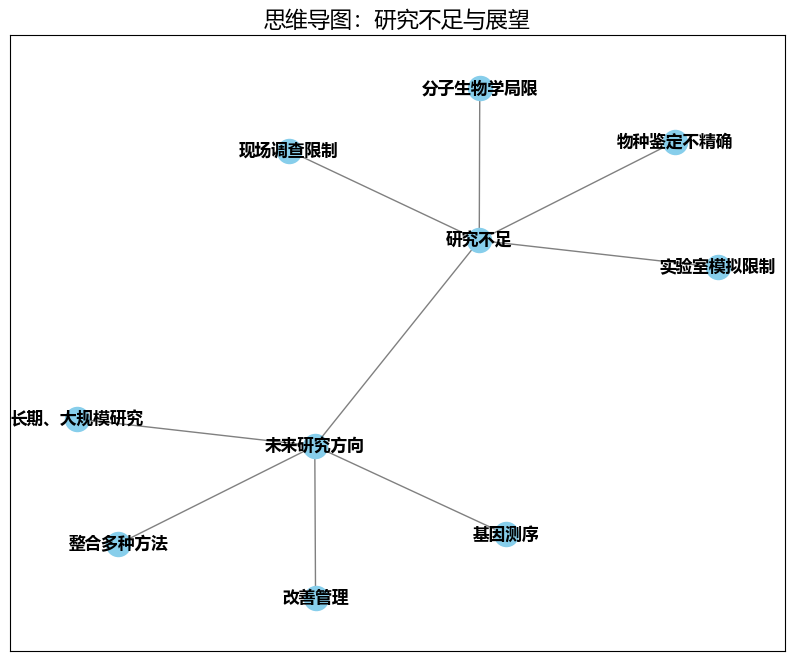

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建图
G = nx.Graph()

# 添加节点
nodes = [
    "研究不足",
    "物种鉴定不精确",
    "实验室模拟限制",
    "现场调查限制",
    "分子生物学局限",
    "未来研究方向",
    "基因测序",
    "整合多种方法",
    "长期、大规模研究",
    "改善管理"
]

# 添加边
edges = [
    ("研究不足", "物种鉴定不精确"),
    ("研究不足", "实验室模拟限制"),
    ("研究不足", "现场调查限制"),
    ("研究不足", "分子生物学局限"),
    ("研究不足", "未来研究方向"),
    ("未来研究方向", "基因测序"),
    ("未来研究方向", "整合多种方法"),
    ("未来研究方向", "长期、大规模研究"),
    ("未来研究方向", "改善管理"),
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# 绘制
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", font_size=12, font_weight="bold")
plt.title("思维导图：研究不足与展望", fontsize=16)
plt.show()


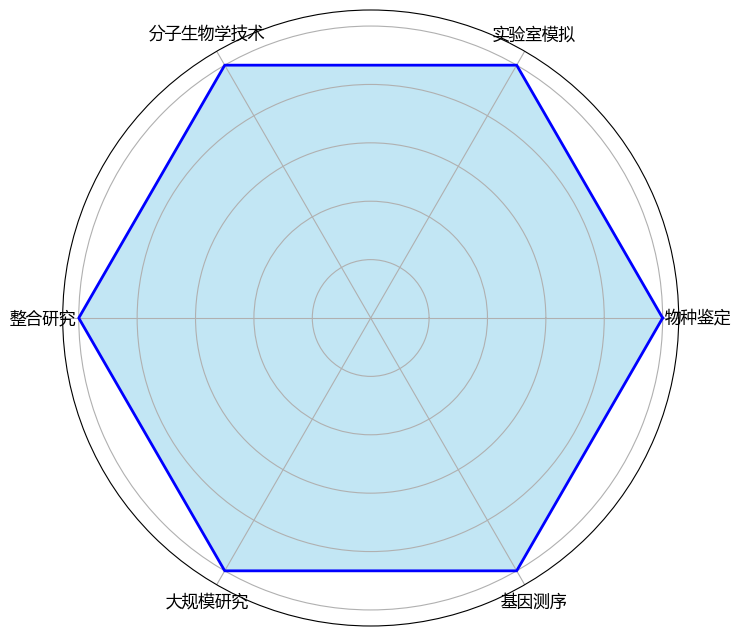

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# 定义各研究方向的评分
labels = ["物种鉴定", "实验室模拟", "分子生物学技术", "整合研究", "大规模研究", "基因测序"]
values = [5, 5, 5, 5, 5, 5]

# 计算雷达图的角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# 使图形封闭
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color="skyblue", alpha=0.5)
ax.plot(angles, values, color="blue", linewidth=2)

# 添加标签和标题
ax.set_yticklabels([])  # 不显示纵坐标
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# plt.title("研究方向雷达图", fontsize=16)
plt.savefig('研究方向雷达图.svg')
plt.show()
